## Imports

In [32]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

In [33]:
np.set_printoptions(threshold=sys.maxsize)

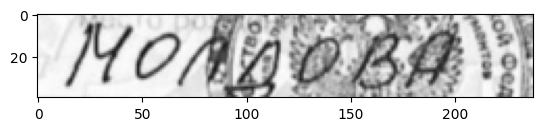

In [67]:
default_img = cv2.imread('/kaggle/input/cyrillic-handwriting-dataset/train/aa1.png', 0)
default_img = cv2.cvtColor(default_img, cv2.COLOR_GRAY2BGR)
plt.imshow(default_img)

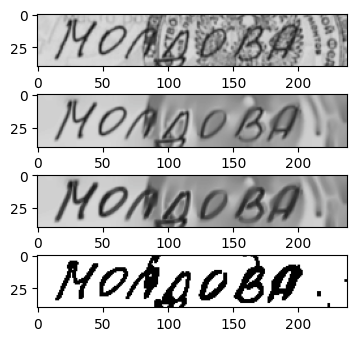

In [71]:
fig = plt.figure(figsize=(4, 4))
rows = 4
columns = 1

img = cv2.normalize(default_img, img, 20, 220, cv2.NORM_MINMAX)
fig.add_subplot(rows, columns, 1)
plt.imshow(img)

img = cv2.fastNlMeansDenoisingColored(img, img, 17, 17, 7, 10)
img = cv2.fastNlMeansDenoisingColored(img, img, 10, 10, 7, 10)
fig.add_subplot(rows, columns, 2)
plt.imshow(img)

kernel = np.ones((2,2),np.uint8)
img = cv2.erode(img, kernel, iterations = 1)
fig.add_subplot(rows, columns, 3)
plt.imshow(img)

res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res = cv2.normalize(res, res, 0, 1.0, cv2.NORM_MINMAX)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) [1]
res = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
fig.add_subplot(rows, columns, 4)
plt.imshow(res)